In [1]:
!pip install recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 12.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.3/355.3 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.2/264.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.7/500.7 kB 32.8 MB/s et

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [3]:
DATA_PATH = '/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/ml-1m'

In [4]:
ratings = pd.read_csv(f'{DATA_PATH}/ratings.dat', sep="::", names=['user_id','movie_id', 'rating','timestamp'])
movies = pd.read_csv(f'{DATA_PATH}/movies.dat', sep="::", encoding="latin-1",
                     names=['movie_id', 'movie_title', 'genre'])

<ipython-input-4-a6410e8afdea>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(f'{DATA_PATH}/ratings.dat', sep="::", names=['user_id','movie_id', 'rating','timestamp'])
<ipython-input-4-a6410e8afdea>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv(f'{DATA_PATH}/movies.dat', sep="::", encoding="latin-1",


In [ ]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
ratings = ratings.sort_values(['user_id', 'timestamp'])
ratings.head()

,user_id,movie_id,rating,timestamp
31,1,3186,4,978300019
22,1,1270,5,978300055
27,1,1721,4,978300055
37,1,1022,5,978300055
24,1,2340,3,978300103


In [ ]:
movies

,movie_id,movie_title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


## EDA

In [ ]:
len(ratings), len(movies)

(1000209, 3883)

In [ ]:
len(ratings['user_id'].unique()), len(ratings['movie_id'].unique())

(6040, 3706)

In [ ]:
movie_stat_by_user = ratings.groupby('user_id').agg({'movie_id':'nunique'})
movie_stat_by_user[["movie_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
movie_id,6040.0,165.597517,192.747029,20.0,44.0,96.0,208.0,2314.0


In [ ]:
user_stat_by_movie = ratings.groupby('movie_id').agg({'user_id':'nunique'})
user_stat_by_movie[["user_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3706.0,269.889099,384.047838,1.0,33.0,123.5,350.0,3428.0


<Axes: xlabel='movie_id', ylabel='Count'>

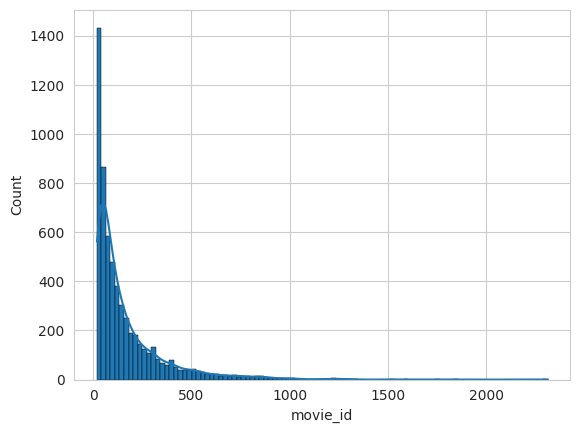

In [ ]:
sns.histplot(movie_stat_by_user["movie_id"],bins=100,alpha=1,fill=True, kde=True, edgecolor="black")

<Axes: title={'center': 'Score Distribution'}, xlabel='rating'>

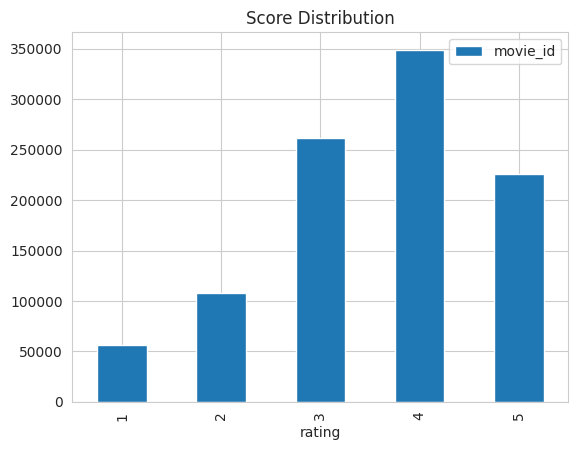

In [ ]:
ratings.groupby('rating').count()[['movie_id']].plot(kind="bar", title="Score Distribution")

In [ ]:
ratings[['rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1000209.0,3.581564,1.117102,1.0,3.0,4.0,4.0,5.0


In [ ]:
user_score_stat =  ratings.groupby('user_id').agg({'rating':['min','mean','median','max','std']})
user_score_stat.columns = ["_".join(a) for a in user_score_stat.columns.to_flat_index()]
user_score_stat[["rating_mean"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rating_mean,6040.0,3.702705,0.429622,1.015385,3.444444,3.735294,4.0,4.962963


<Axes: xlabel='rating_mean', ylabel='Count'>

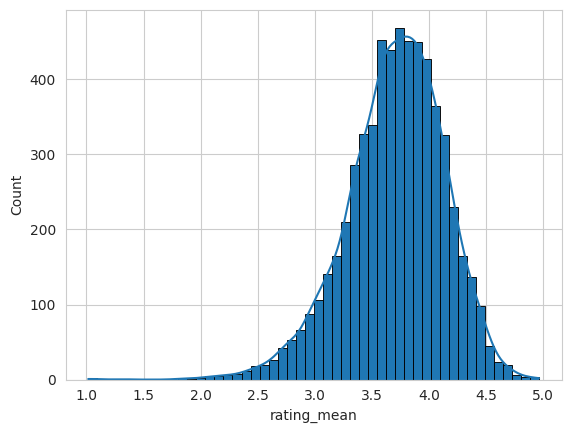

In [ ]:
sns.histplot(user_score_stat["rating_mean"],bins=50,alpha=1,fill=True, kde=True, edgecolor="black")

## Sampling

In [ ]:
movies_filtered = ratings[ratings.rating > 2]

In [ ]:
len(movies_filtered)

836478

In [ ]:
len(movies_filtered['user_id'].unique()), len(movies_filtered['movie_id'].unique())

(6039, 3628)

In [ ]:
user_stat_by_movie = movies_filtered.groupby('movie_id').agg({'user_id':'nunique'})
top_100_movie = user_stat_by_movie.sort_values('user_id', ascending=False)[:100]

In [ ]:
top_100_movie.join(movies.set_index('movie_id'))[:20]

,user_id,movie_title,genre
movie_id,,,
2858,3211,American Beauty (1999),Comedy|Drama
260,2910,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
1196,2885,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
1210,2716,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
2028,2561,Saving Private Ryan (1998),Action|Drama|War
589,2509,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
593,2498,"Silence of the Lambs, The (1991)",Drama|Thriller
1198,2473,Raiders of the Lost Ark (1981),Action|Adventure
1270,2460,Back to the Future (1985),Comedy|Sci-Fi


In [ ]:
movie_stat_by_user = movies_filtered.groupby('user_id').agg({'movie_id':'nunique'})
movie_stat_by_user[["movie_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
movie_id,6039.0,138.512668,156.241599,1.0,38.0,81.0,177.0,1968.0


In [ ]:
user_less_than_20 = movie_stat_by_user[movie_stat_by_user.movie_id < 20].index

In [ ]:
len(user_less_than_20)

284

In [ ]:
movies_filtered = movies_filtered[~movies_filtered.user_id.isin(user_less_than_20)]

In [ ]:
len(movies_filtered)

831746

In [ ]:
movie_stat_by_user = movies_filtered.groupby('user_id').agg({'movie_id':'nunique'})
movie_stat_by_user[["movie_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
movie_id,5755.0,144.525804,157.629331,20.0,42.0,88.0,186.0,1968.0


In [ ]:
user_stat_by_book = movies_filtered.groupby('movie_id').agg({'user_id':'nunique'})
user_stat_by_book[["user_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3624.0,229.510486,352.856606,1.0,23.0,87.0,285.0,3122.0


### Chronological Split

In [ ]:
pip install recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.3/355.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.2/264.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.8/496.8 kB 38.7 MB/s et

In [ ]:
from recommenders.datasets.python_splitters import python_chrono_split

In [ ]:
movies_filtered

,user_id,movie_id,rating,timestamp
31,1,3186,4,978300019
22,1,1270,5,978300055
27,1,1721,4,978300055
37,1,1022,5,978300055
24,1,2340,3,978300103
...,...,...,...,...
1000019,6040,2917,4,997454429
999988,6040,1921,4,997454464
1000172,6040,1784,3,997454464
1000167,6040,161,3,997454486


In [ ]:
data_train_full, data_test = python_chrono_split(
    movies_filtered, ratio=0.80, filter_by="user",
    col_user="user_id", col_item="movie_id", col_timestamp="timestamp"
)

data_train, data_valid = python_chrono_split(
    data_train_full, ratio=0.80, filter_by="user",
    col_user="user_id", col_item="movie_id", col_timestamp="timestamp"
)

In [ ]:
len(data_train_full), len(data_train), len(data_valid), len(data_test)

(665395, 532328, 133067, 166351)

In [ ]:
data_train_full.user_id.nunique(), data_test.user_id.nunique()

(5755, 5755)

In [ ]:
data_train_full.movie_id.nunique(), data_test.movie_id.nunique()

(3571, 3460)

In [ ]:
PATH_TO_PROCESSED_DATA = '/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/ml-1m/data_split/'

In [ ]:
movies_filtered.to_csv(PATH_TO_PROCESSED_DATA + 'all_filtered_data.txt', sep='\t', index=False)

In [ ]:
data_train_full.to_csv(PATH_TO_PROCESSED_DATA + 'data_train_full.tsv', sep='\t', index=False)
data_train.to_csv(PATH_TO_PROCESSED_DATA + 'data_train.tsv', sep='\t', index=False)
data_valid.to_csv(PATH_TO_PROCESSED_DATA + 'data_valid.tsv', sep='\t', index=False)
data_test.to_csv(PATH_TO_PROCESSED_DATA + 'data_test.tsv', sep='\t', index=False)

## EDA Data Sampled

In [5]:
movies_filtered = pd.read_csv('/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/ml-1m/data_split/all_filtered_data.txt', sep="\t")

In [6]:
len(movies_filtered)

831746

In [7]:
movies_filtered

,user_id,movie_id,rating,timestamp
0,1,3186,4,978300019
1,1,1270,5,978300055
2,1,1721,4,978300055
3,1,1022,5,978300055
4,1,2340,3,978300103
...,...,...,...,...
831741,6040,2917,4,997454429
831742,6040,1921,4,997454464
831743,6040,1784,3,997454464
831744,6040,161,3,997454486


In [33]:
count_movie_watch_user = movies_filtered.groupby('user_id').agg({'movie_id':'nunique', 'rating':'mean'})
count_movie_watch_user[["movie_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
movie_id,5755.0,144.525804,157.629331,20.0,42.0,88.0,186.0,1968.0


In [34]:
count_movie_watch_user[["rating"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,5755.0,4.025831,0.27356,3.142395,3.833333,4.024845,4.212585,5.0


In [31]:
count_user_in_movie = movies_filtered.groupby('movie_id').agg({'user_id':'nunique', 'rating':'mean'})
count_user_in_movie[["user_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3624.0,229.510486,352.856606,1.0,23.0,87.0,285.0,3122.0


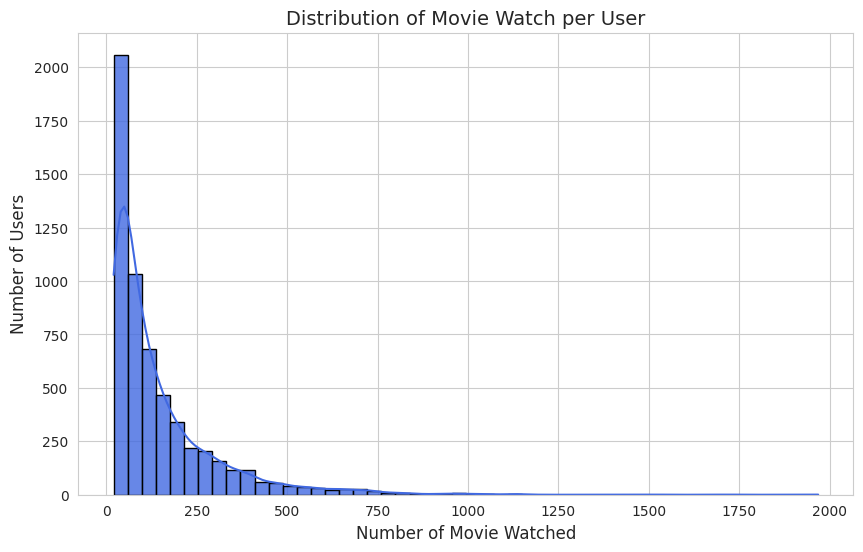

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(count_movie_watch_user["movie_id"], bins=50, alpha=0.8, fill=True, kde=True, edgecolor="black", color="royalblue")
plt.title("Distribution of Movie Watch per User", fontsize=14)
plt.xlabel("Number of Movie Watched", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.show()

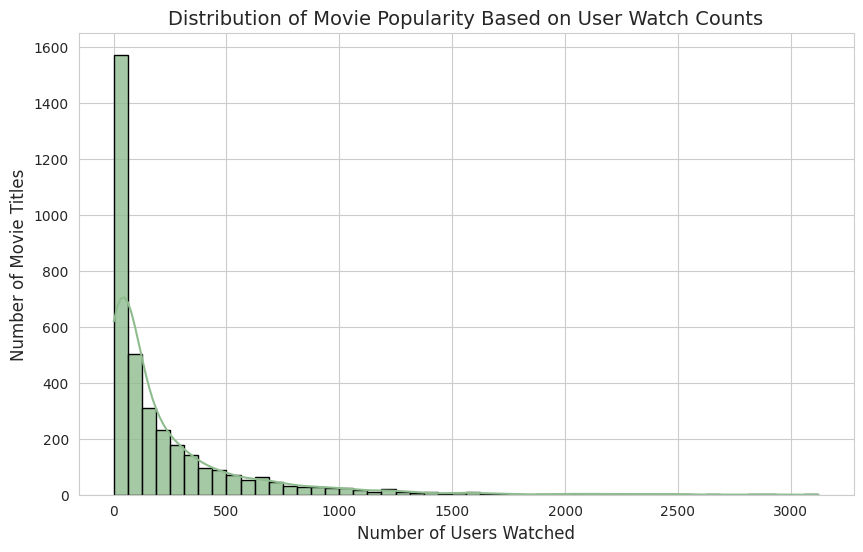

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(count_user_in_movie["user_id"], bins=50, alpha=0.8, fill=True, kde=True, edgecolor="black", color="darkseagreen")
plt.title("Distribution of Movie Popularity Based on User Watch Counts", fontsize=14)
plt.xlabel("Number of Users Watched", fontsize=12)
plt.ylabel("Number of Movie Titles", fontsize=12)
plt.show()

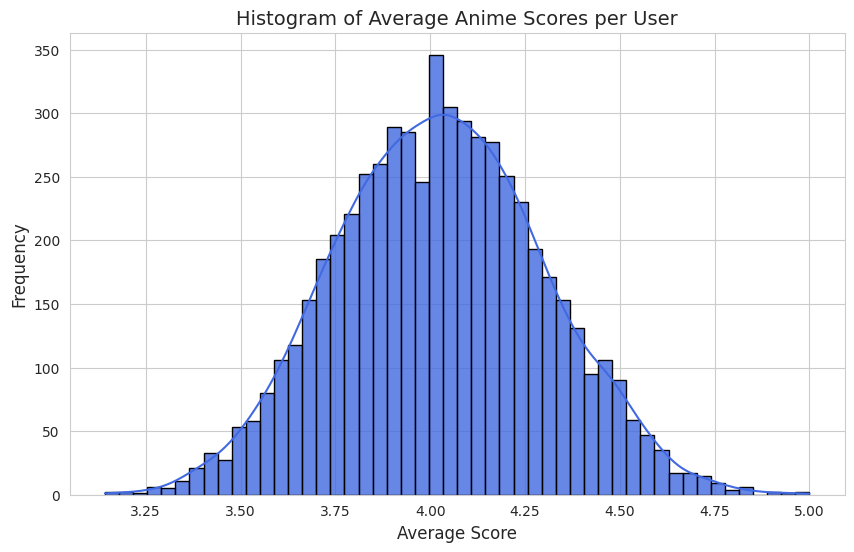

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(count_movie_watch_user["rating"], bins=50, alpha=0.8, fill=True, kde=True, edgecolor="black", color="royalblue")
plt.title("Histogram of Average Anime Scores per User", fontsize=14)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
movie_stat = movies_filtered.groupby('movie_id').agg({'user_id': 'count', 'rating':'mean'})
movie_stat[['user_id']].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3624.0,229.510486,352.856606,1.0,23.0,87.0,285.0,3122.0


### Calculate Sparsity

In [37]:
len(ratings), len(movies_filtered)

(1000209, 831746)

In [38]:
from scipy.sparse import csr_matrix

def calculate_sparsity(user_item_matrix):
  matrix = user_item_matrix.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value=0)
  sparse_matrix = csr_matrix(matrix.values)

  total_possible = matrix.shape[0] * matrix.shape[1]

  nonzero_count = sparse_matrix.count_nonzero()

  sparsity = 1 - (nonzero_count / total_possible)
  return sparsity

In [39]:
calculate_sparsity(ratings)

0.9553163743776871

In [40]:
calculate_sparsity(movies_filtered)

0.9601198113551322

### Check Sequence Dependence

In [8]:
!pip install mlxtend

In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [13]:
movies_title = movies[['movie_id', 'movie_title']].set_index('movie_id')
movie_rating_title = movies_filtered.join(movies_title, on="movie_id", how="inner")

In [14]:
movie_rating_title = movie_rating_title.dropna()

In [15]:
len(movie_rating_title)

831746

In [16]:
sequences_sample = movie_rating_title.groupby('user_id')['movie_title'].apply(list).tolist()

In [17]:
te = TransactionEncoder()
te_ary = te.fit(sequences_sample).transform(sequences_sample)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5751,False,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
5752,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5753,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [18]:
frequent_itemsets = fpgrowth(df, min_support=0.1, use_colnames=True)

In [19]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [20]:
len(rules)

1678814

In [22]:
rules['len_antecedents'] = rules['antecedents'].str.len()
rules['len_consequents'] = rules['consequents'].str.len()

In [27]:
top_10_rules = rules[(rules.len_antecedents == 1) & (rules.len_consequents == 1)].sort_values('confidence', ascending=False)[:10]

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
G = nx.DiGraph()

# Add edges (rules) to graph
for idx, row in top_10_rules.iterrows():
    ant = ', '.join(row['antecedents'])  # Join if multiple items
    cons = ', '.join(row['consequents'])
    conf = row['confidence']
    G.add_edge(ant, cons, weight=conf)

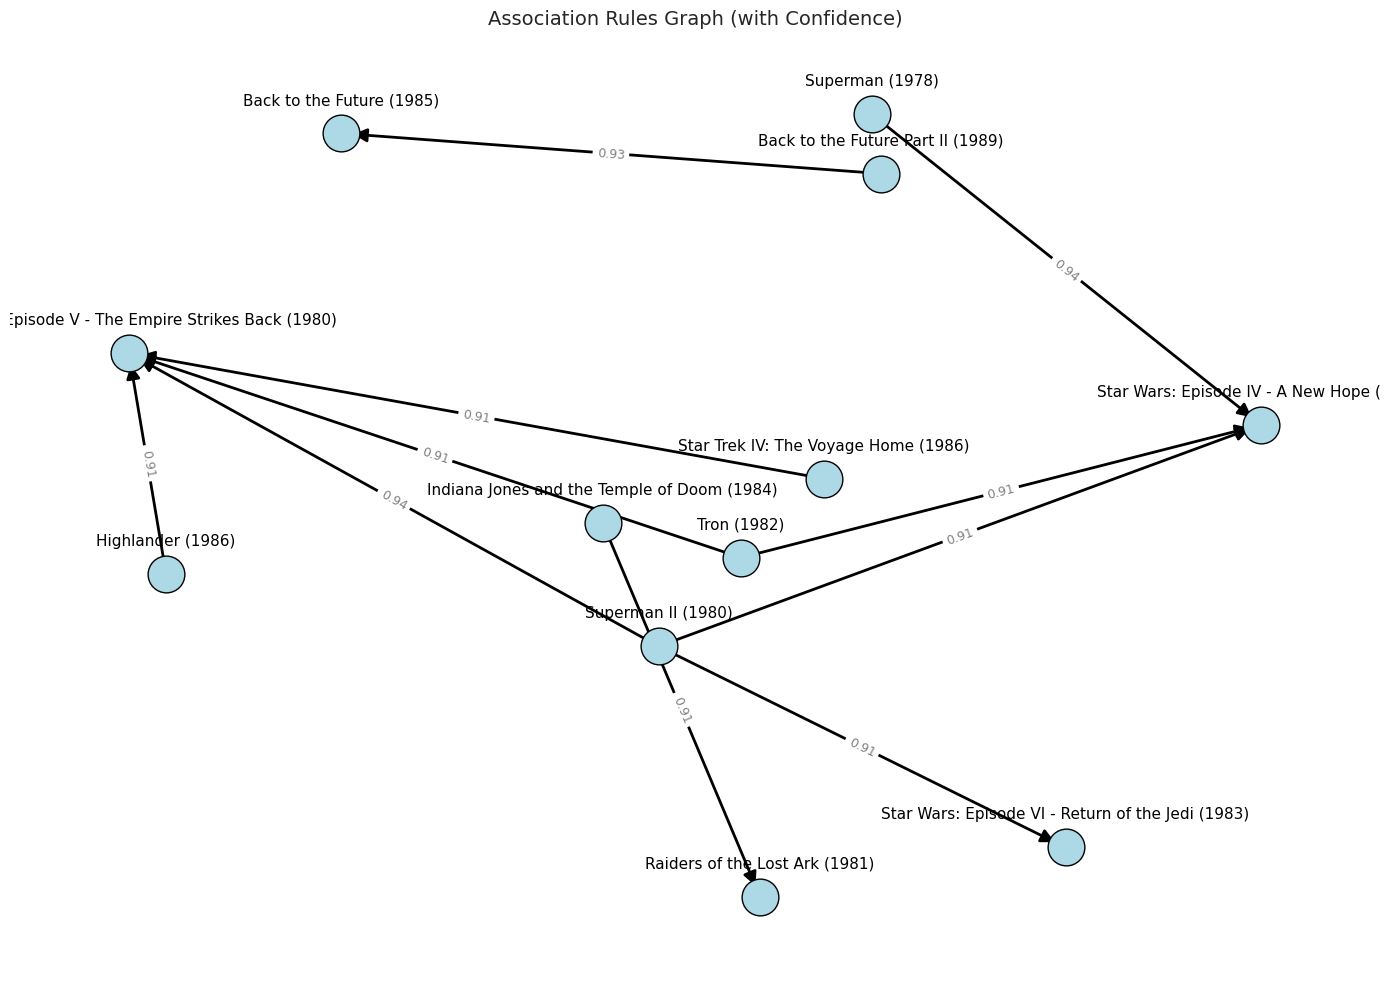

In [30]:
pos = nx.spring_layout(G, seed=42, k=1.2)

# Extract weights (confidence)
weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_colors = weights
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}

# Create figure
plt.figure(figsize=(14, 10))

nx.draw_networkx_edges(
    G, pos,
    width=2,
    arrows=True,
    arrowstyle='-|>',
    arrowsize=20# slight curve for better visibility
)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue', edgecolors='black')

# Draw node labels (above nodes)
label_pos = {k: (v[0], v[1] + 0.08) for k, v in pos.items()}
nx.draw_networkx_labels(G, label_pos, font_size=11)

# Draw edge labels (confidence)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray', font_size=9)

# Final touches
plt.title("Association Rules Graph (with Confidence)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()